In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import explore
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = wrangle.wrangle_data()

In [15]:
df.head()

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance,description,...,railway,roundabout,station,stop,traffic_calming,traffic_signal,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,0,0,0,0,0,0,1,1,1,1
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,0,0,0,0,0,0,0,0,0,0
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,0,0,0,0,0,0,0,0,0,0
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,...,0,0,0,0,0,0,0,0,0,0
10,A-11,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207273 entries, 0 to 2845341
Data columns (total 43 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     2207273 non-null  object        
 1   severity               2207273 non-null  int64         
 2   start_time             2207273 non-null  datetime64[ns]
 3   end_time               2207273 non-null  datetime64[ns]
 4   start_lat              2207273 non-null  float64       
 5   start_lng              2207273 non-null  float64       
 6   end_lat                2207273 non-null  float64       
 7   end_lng                2207273 non-null  float64       
 8   distance               2207273 non-null  float64       
 9   description            2207273 non-null  object        
 10  street                 2207273 non-null  object        
 11  side                   2207273 non-null  object        
 12  city                   22072

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
severity,2207273.0,2.074859,0.383238,1.000000,2.000000,2.000000,2.000000,4.00000
start_lat,2207273.0,36.007299,5.472468,24.566027,32.961350,35.742367,40.068347,49.00058
start_lng,2207273.0,-96.620998,18.264586,-124.548074,-117.977604,-91.066492,-80.335175,-67.48413
end_lat,2207273.0,36.007446,5.472576,24.566013,32.960691,35.743016,40.068511,49.07500
end_lng,2207273.0,-96.620736,18.264335,-124.545748,-117.978254,-91.065553,-80.335591,-67.48413
distance,2207273.0,0.696786,1.505375,0.000000,0.046000,0.210000,0.782000,155.18600
temperature,2207273.0,61.837794,18.560787,-33.000000,50.000000,64.000000,76.000000,119.00000
wind_chill,2207273.0,60.716221,20.517143,-50.100000,50.000000,64.000000,76.000000,119.00000
humidity,2207273.0,64.685077,22.713100,1.000000,49.000000,67.000000,84.000000,100.00000
pressure,2207273.0,29.373684,1.092009,16.720000,29.210000,29.730000,29.970000,58.90000


In [18]:
df = wrangle.downsample_data(df)

In [19]:
train, validate, test = explore.split_data(df, 'severity')

In [20]:
train.shape, validate.shape, test.shape

((129144, 43), (43048, 43), (43048, 43))

In [21]:
cols = ['distance','precipitation','visibility']

In [22]:
X_train, y_train = train[cols], train.severity
X_validate, y_validate = validate[cols], validate.severity
X_test, y_test = test[cols], test.severity

In [75]:
def rand_forest(X_train, y_train, depth, samples):
    # Make the model
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=samples, random_state=217)
    # Fit the model (on train and only train)
    forest.fit(X_train, y_train)
    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)
    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f'Tree depth: {depth}, minimum sample size: {samples}')
    return pd.DataFrame(report)


In [76]:
rand_forest(X_train, y_train, 6, 6)

Tree depth: 6, minimum sample size: 6


,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.792909,0.485419,0.535143,0.471617,0.510035,0.571272,0.530006
recall,0.327531,0.554410,0.537215,0.504549,0.510035,0.480926,0.510035
f1-score,0.463572,0.517626,0.536177,0.487527,0.510035,0.501226,0.508592
support,14133.000000,39000.000000,38748.000000,37263.000000,0.510035,129144.000000,129144.000000


In [27]:
# Let's use a for loop to compare the accuracy off different depths
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                 1             2             3             4  accuracy  \
precision      0.0      0.512820      0.473169      0.401745  0.445766   
recall         0.0      0.346692      0.471276      0.692000  0.445766   
f1-score       0.0      0.413701      0.472220      0.508359  0.445766   
support    14133.0  39000.000000  38748.000000  37263.000000  0.445766   

               macro avg   weighted avg  
precision       0.346933       0.412753  
recall          0.377492       0.445766  
f1-score        0.348570       0.413298  
support    129144.000000  129144.000000  

Tree with max depth of 3
                 1             2             3             4  accuracy  \
precision      0.0      0.511303      0.473280      0.403588  0.447051   
recall         0.0      0.354923      0.472670      0.686391  0.447051   
f1-score       0.0      0.418997      0.472975      0.508302  0.447051   
support    14133.0  39000.000000  38748.000000  37263.000000  0.447051  

In [28]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.445766,0.443784,0.001982
1,3,0.447051,0.444434,0.002617
2,4,0.447454,0.444806,0.002648
3,5,0.449576,0.445898,0.003678
4,6,0.450799,0.446594,0.004205
5,7,0.452007,0.446896,0.005111
6,8,0.453532,0.446804,0.006729
7,9,0.455979,0.447431,0.008549
8,10,0.458217,0.447849,0.010368
9,11,0.462747,0.448151,0.014596


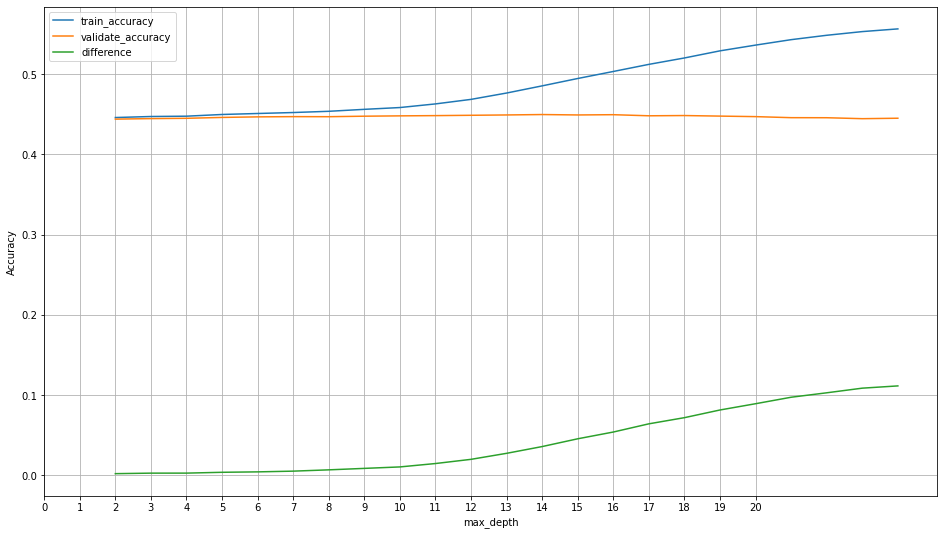

In [29]:
# Let's plot the different accuracies and differences
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()


In [30]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.506892,0.448104,0.058787
1,3,17,0.494719,0.449243,0.045476
2,4,16,0.485055,0.449150,0.035906
3,5,15,0.478056,0.449243,0.028813
4,6,14,0.471660,0.448848,0.022812
5,7,13,0.466665,0.449034,0.017631
6,8,12,0.461934,0.449127,0.012807
7,9,11,0.458527,0.448221,0.010306
8,10,10,0.455383,0.447222,0.008161
9,11,9,0.453509,0.447082,0.006427


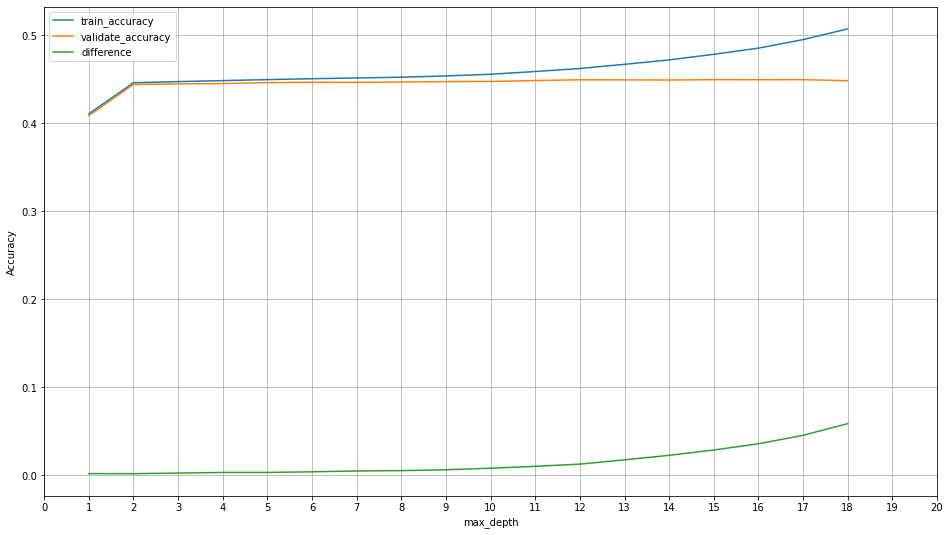

In [31]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [32]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.445766,0.443784,0.001982
1,3,3,0.447051,0.444434,0.002617
2,4,4,0.447779,0.445015,0.002764
3,5,5,0.449351,0.446037,0.003314
4,6,6,0.450784,0.446316,0.004468
5,7,7,0.451550,0.446478,0.005072
6,8,8,0.452611,0.446780,0.005831
7,9,9,0.453819,0.447013,0.006806
8,10,10,0.455383,0.447222,0.008161
9,11,11,0.457675,0.448615,0.009060


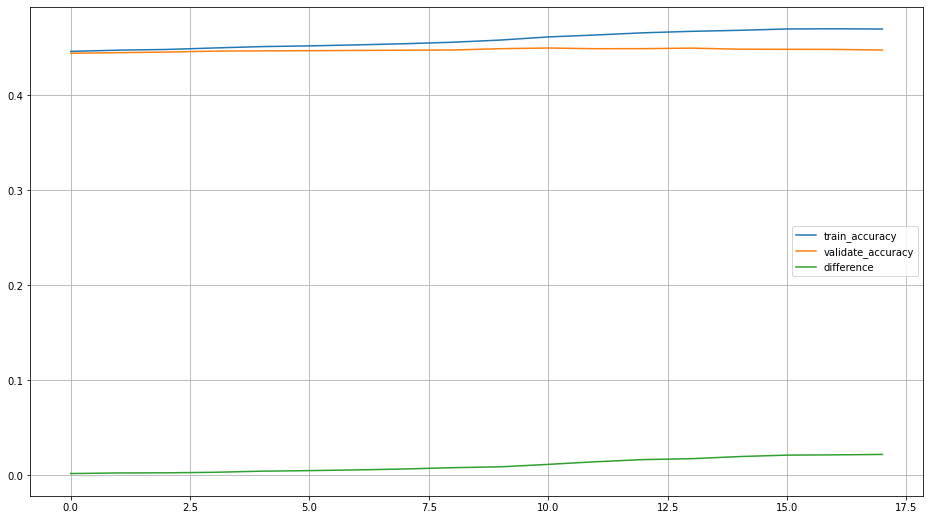

In [33]:
df[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

In [34]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.450722,0.446641,0.004081
1,3,6,0.451008,0.446850,0.004158
2,4,6,0.450791,0.446432,0.004359
3,5,6,0.450683,0.446269,0.004414
4,6,6,0.450784,0.446316,0.004468
5,7,6,0.450822,0.446525,0.004298
6,8,6,0.450830,0.446246,0.004584
7,9,6,0.450745,0.446269,0.004476
8,10,6,0.450505,0.446455,0.004050
9,11,6,0.450559,0.446455,0.004104


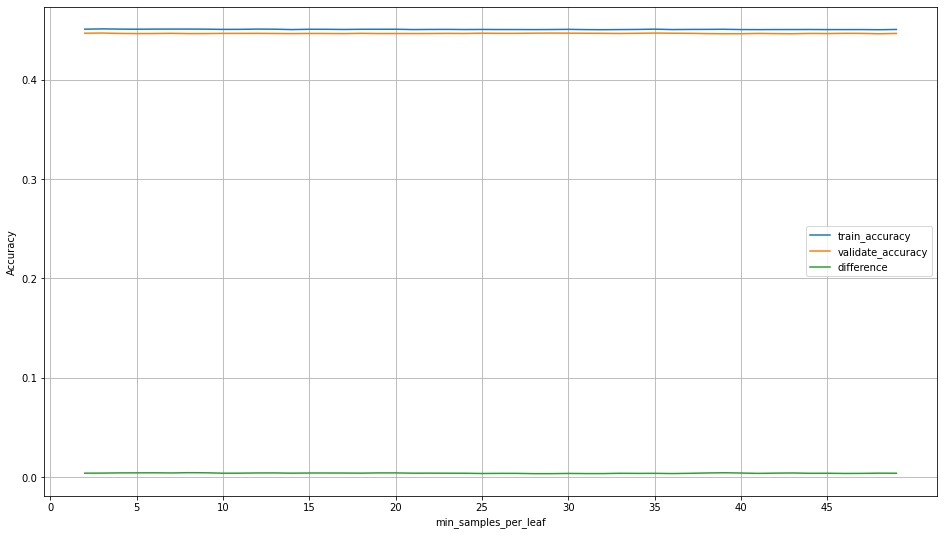

In [35]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()


In [36]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))

In [37]:
model_scores

[0.4455336678436474,
 0.44657901257510996,
 0.4478566561357864,
 0.4488090813355634,
 0.4497073034751905,
 0.45194511552995104]

In [39]:
models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

    #predict it
    y_pred = knn.predict(X_train)
    
    #score it
    acc = knn.score(X_train, y_train)
    
    models_acc.append([x, acc])

In [40]:
pd.DataFrame(models_acc, columns =['neighbors','accuracy'])

,neighbors,accuracy
0,1,0.487417
1,2,0.452727
2,3,0.463188
3,4,0.459758
4,5,0.456831
5,6,0.455546
6,7,0.456103
7,8,0.454849
8,9,0.454291
9,10,0.453571


In [41]:
models_acc = []

for x in range(1,31):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

#     predict it
#     y_pred = knn.predict(X_train)
#     y_pred_val = knn.predict(X_validate)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc_val = knn.score(X_validate, y_validate)
    
    models_acc.append([x, acc, acc_val])

In [42]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy',
                                  'validate_accuracy'])
df_models

,neighbors,train_accuracy,validate_accuracy
0,1,0.487417,0.378740
1,2,0.452727,0.373815
2,3,0.463188,0.389867
3,4,0.459758,0.390982
4,5,0.456831,0.392933
5,6,0.455546,0.395977
6,7,0.456103,0.398602
7,8,0.454849,0.402225
8,9,0.454291,0.403550
9,10,0.453571,0.404363


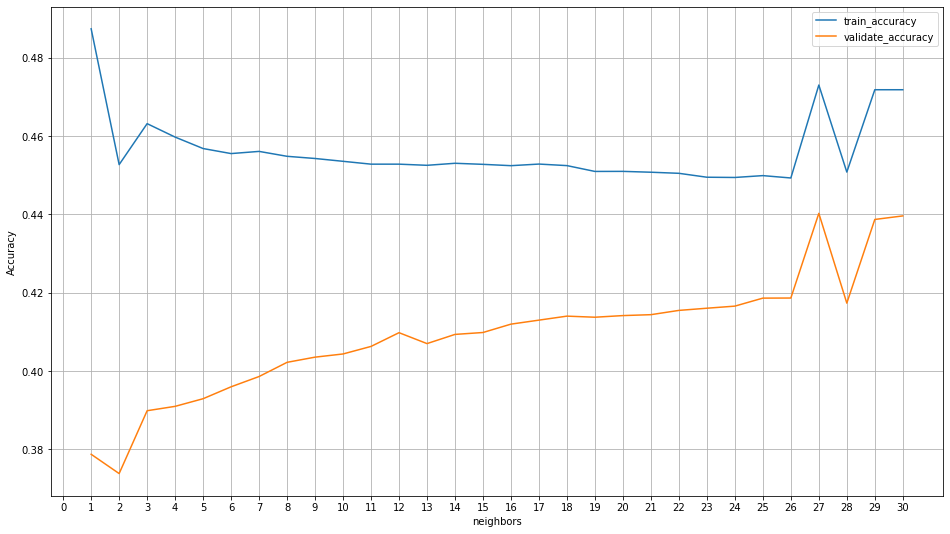

In [43]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

In [44]:
# Create the logistic regression
logit = LogisticRegression(random_state=217)

# Fit a model using only these specified features
logit.fit(X_train, y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train)

In [47]:
baseline_accuracy = round((train.severity == 2).mean(), 2)
baseline_accuracy

0.3

In [48]:
print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.3
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.35


In [49]:
# use the class_weights to hold the actual ratios`
logit2 = LogisticRegression(random_state=217, class_weight='balanced')
logit2.fit(X_train, y_train)
y_pred = logit2.predict(X_train)
accuracy = logit2.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.27


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129144 entries, 2268970 to 2209874
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     129144 non-null  object        
 1   severity               129144 non-null  int64         
 2   start_time             129144 non-null  datetime64[ns]
 3   end_time               129144 non-null  datetime64[ns]
 4   start_lat              129144 non-null  float64       
 5   start_lng              129144 non-null  float64       
 6   end_lat                129144 non-null  float64       
 7   end_lng                129144 non-null  float64       
 8   distance               129144 non-null  float64       
 9   description            129144 non-null  object        
 10  street                 129144 non-null  object        
 11  side                   129144 non-null  object        
 12  city                   129144 non-nul

In [51]:
cols = ['distance','precipitation','visibility','humidity','temperature','pressure','wind_speed','amenity','bump', 
       'crossing','give_way','junction','no_exit','railway','roundabout','station','stop','traffic_calming',
       'traffic_signal','sunrise_sunset']

In [52]:
X_train, y_train = train[cols], train.severity
X_validate, y_validate = validate[cols], validate.severity
X_test, y_test = test[cols], test.severity

In [53]:
# Let's use a for loop to compare the accuracy off different depths
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                      1             2             3             4  accuracy  \
precision      0.911188      0.431853      0.511443      0.455269   0.47135   
recall         0.187292      0.679615      0.514452      0.316292   0.47135   
f1-score       0.310717      0.528120      0.512943      0.373264   0.47135   
support    14133.000000  39000.000000  38748.000000  37263.000000   0.47135   

               macro avg   weighted avg  
precision       0.577438       0.514946  
recall          0.424413       0.471350  
f1-score        0.431261       0.455093  
support    129144.000000  129144.000000  

Tree with max depth of 3
                      1             2             3             4  accuracy  \
precision      0.826360      0.433929      0.517421      0.461386  0.477784   
recall         0.241775      0.648846      0.526608      0.337493  0.477784   
f1-score       0.374097      0.520058      0.521974      0.389833  0.477784   
support    14133.000000  39

In [54]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.471350,0.462809,0.008541
1,3,0.477784,0.470103,0.007681
2,4,0.498862,0.490847,0.008014
3,5,0.504716,0.497282,0.007434
4,6,0.511770,0.505134,0.006636
5,7,0.518716,0.509036,0.009679
6,8,0.525491,0.514008,0.011483
7,9,0.532731,0.516935,0.015796
8,10,0.545593,0.525204,0.020388
9,11,0.557122,0.529177,0.027946


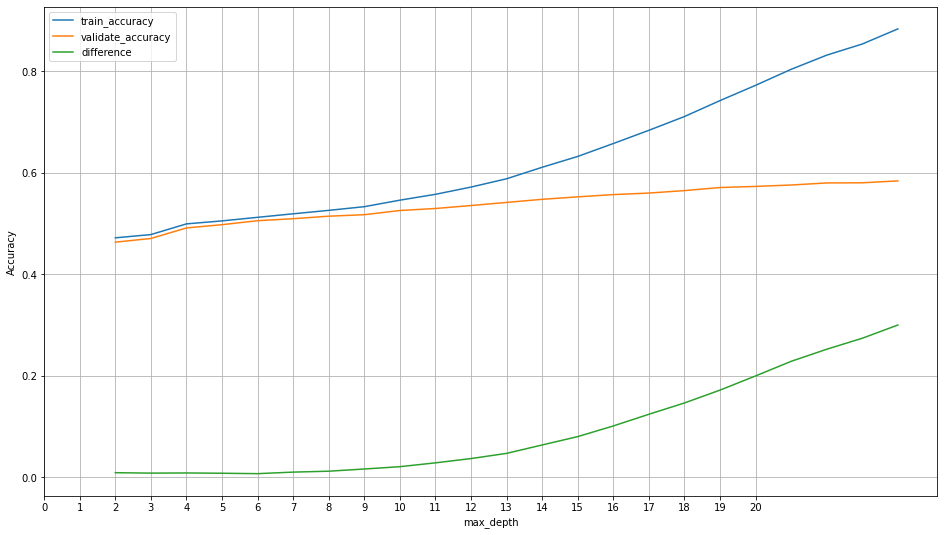

In [55]:
# Let's plot the different accuracies and differences
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()


In [56]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.672087,0.559422,0.112665
1,3,17,0.634129,0.554311,0.079818
2,4,16,0.610218,0.549178,0.061040
3,5,15,0.591402,0.544462,0.046940
4,6,14,0.577247,0.539444,0.037803
5,7,13,0.565431,0.535867,0.029564
6,8,12,0.555938,0.532173,0.023764
7,9,11,0.546901,0.527133,0.019769
8,10,10,0.535890,0.519490,0.016400
9,11,9,0.530152,0.517631,0.012521


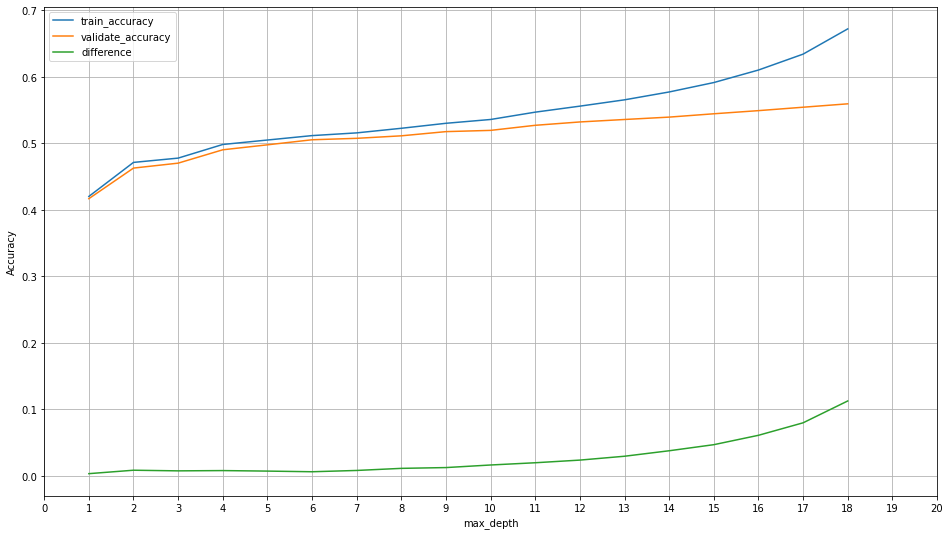

In [57]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [58]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.471350,0.462809,0.008541
1,3,3,0.477769,0.470103,0.007666
2,4,4,0.498777,0.490638,0.008138
3,5,5,0.505436,0.498025,0.007410
4,6,6,0.511847,0.505738,0.006109
5,7,7,0.516315,0.508061,0.008254
6,8,8,0.523571,0.512614,0.010957
7,9,9,0.528519,0.515866,0.012653
8,10,10,0.535890,0.519490,0.016400
9,11,11,0.544307,0.526273,0.018034


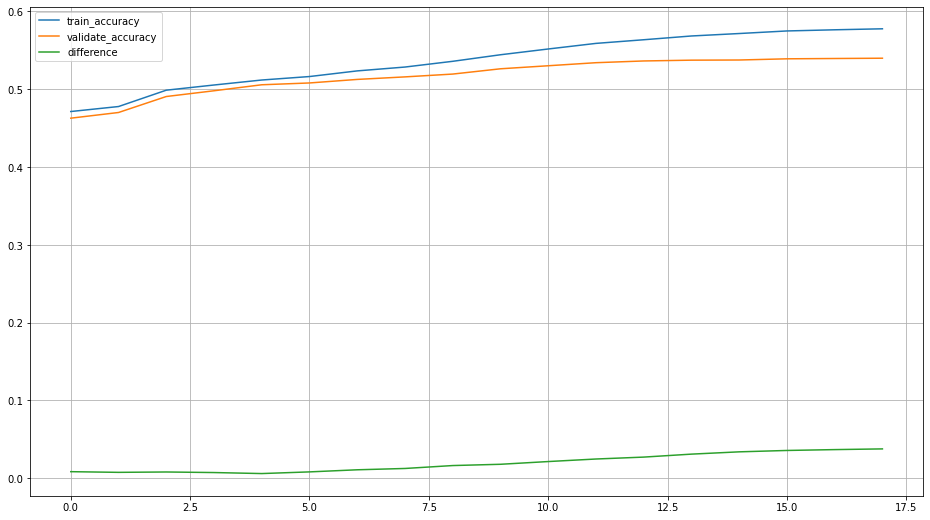

In [59]:
df[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

In [60]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.510833,0.504576,0.006257
1,3,6,0.510531,0.504460,0.006071
2,4,6,0.511367,0.505482,0.005885
3,5,6,0.510980,0.504762,0.006218
4,6,6,0.511847,0.505738,0.006109
5,7,6,0.511630,0.505877,0.005753
6,8,6,0.511390,0.505715,0.005676
7,9,6,0.512141,0.506551,0.005591
8,10,6,0.510035,0.504600,0.005436
9,11,6,0.510663,0.504298,0.006365


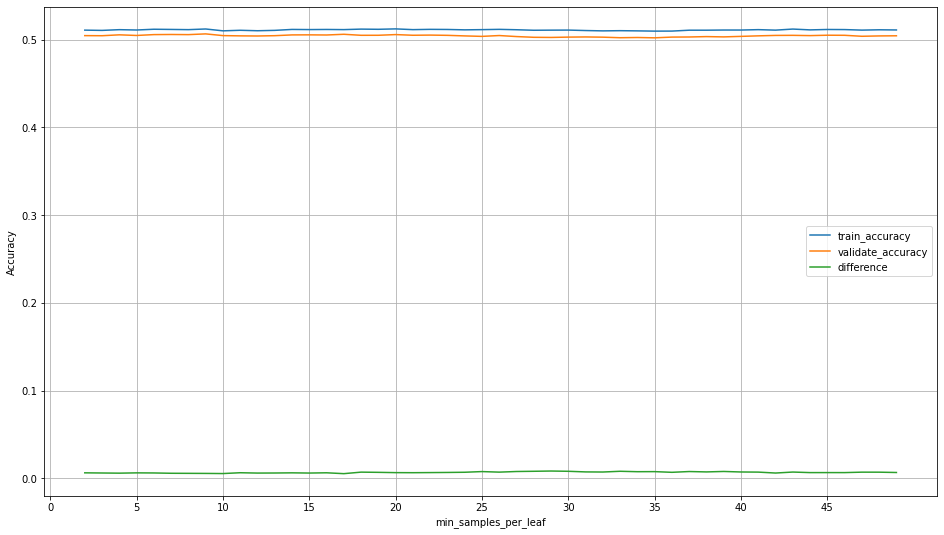

In [61]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()


In [62]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))

In [63]:
model_scores

[0.4668354704825621,
 0.47302236263395897,
 0.4819116644985443,
 0.48858638419129036,
 0.4943706250387165,
 0.5015564021557332]

In [ ]:
models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

    #predict it
    y_pred = knn.predict(X_train)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc2 = knn.score(X_validate, y_validate)
    models_acc.append([x, acc, acc2])

In [ ]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy', 'validate_accuracy'])
df_models

In [ ]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

In [ ]:
# Create the logistic regression
logit = LogisticRegression(random_state=217)

# Fit a model using only these specified features
logit.fit(X_train, y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train)

In [ ]:
print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

In [ ]:
# use the class_weights to hold the actual ratios`
logit2 = LogisticRegression(random_state=217, class_weight='balanced')
logit2.fit(X_train, y_train)
y_pred = logit2.predict(X_train)
accuracy = logit2.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')